In [1]:
import pandas as pd
import re # re.search etc. regular expressions

Create the Reference Table:
Create a DataFrame that defines your categories, subcategories, and corresponding descriptions.

In [27]:
import pandas as pd

# Reference table for categories and subcategories
# ???? CENTER FOR INTUITIVE P WARREN OH
# ???? GOOGLE *Symfonium Musi g.co/helppay#CA
# ??? CLEVELAND KIDNEY & HYP 216-2616253 OH
categories_data = {
    'Income': {
        'Anita Income': ['ZELLE DEP ANITA'],
        'Fidelity Transfer': ['FID '],
        'KeyBank Cash-Back': ['KEY REWARDS', 'GIFT FROM KEY BANK']
    },
    'Taxes': {
        'Taxes': ['TAXREFUND', 'IRS', 'TAX REF', 'RITA']
    },
    'Fees': {
        'Transaction Fees': ['TRANSACTION FEE']
    },
    'EXCLUDE': {
        'Visa Payment': ['INTERNET TRF TO CCA']
        # 'PAYMENT': ['PAYMENT'],
    },
    # PRESUMABLY CHECKING ACCT
    'Housing': {
        'Mortgage': ['WFHM'],
        'Bills n Utilities': ['VERIZON', 'DOMINION', 'FIRST ENERGY', 'NORTHEAST OHIO', 'CLEVELAND HEIGHTS', 'ENBRIDGE GAS', 'ATT', 'NEORSD', 'CWD']
    },
    'Insurance': {
        'Medical Insurance': ['MEDICARE', 'VSP', 'UNITEDHEALTHCARE', 'ROCKWELL', 'AARP HEALTH', 'DELTA DENTAL'],
        'Car Insurance': ['LIBERTY MUTUAL']
    },
    'Education': {
        'College Tuition': ['SMARTPAYCIA', 'CASHNET', 'CIA', 'BURREN', 'COLLEGE'],
        'Art Supplies': ['UTRECHT', ' ART ']
    },
    'Professional': {
        'Professional Fees': ['LICENSURE', 'LICENSE'],
        'Liability Insurance': ['CPH LIABILITY']
    },
    # PRESUMABLY CREDIT CARD
    'Transportation': {
        'Gas': ['SUNOCO', 'BP', 'SHELL', 'MARATHON', 'CIRCLE K', 'SHEETZ', 'GAS'],
        'Car Maintenance': ['REPAIR', 'AUTO', 'BODY', 'QUALITY AUTO'],
        'Car Registration' : ['BUREAU MOTOR VE']
    },
    'Food': {
        'Groceries': ['GROCERY', 'HEINEN', 'DAVE', 'WHOLE', 'SODA', 'TRADE'],
        'Dining Out': ['TAVERN', 'TOMMYS', 'CAFE', 'WASABI', 'PACIFIC', 'ANATOLIA', 'BATUQUI', 'PHO', 'LAKE HOUSE', 'DEWEY',\
                        'BANANA', 'BANGKOK', 'HIBACHI', 'BRASSICA', 'RESTAUR', 'BUFFALO', 'COZUMEL'],
        'Fast Food': ['LEFTY', 'SHAKE SHACK', 'WENDY', 'BUDDA', 'CILANTRO', 'PANERA', 'CHIPOTLE', 'BIBIBOP', 'ROGERS', 'PIADA', 'SUBSHOPPE', 'NATURES OASIS', 'LOTUS EXPRESS'],
        'World Food': ['KRAKOW', 'NIPA HUT'],
        'Why DOORDASH?': ['DOORDASH']
    },
    'Health & Beauty': {
        'Aikido n Yoga': ['CHECK', ' YOGA'], 
        'Beauty n Supplies': ['LADIES', 'BATH', 'SALLY BEAUTY', 'AVEDA', 'LUSH BEACHWOOD', 'AIKIKAI', 'AIKIDO', 'ATMA', 'PADDLE'],
        'Sound Bath': ['PAYPAL INST'], # ?????
        'Medical and Dental': ['PEDIATRICS', 'CLEVELAND CLINIC', 'METROHEALTH', 'WESTERN RESERVE PERIO'],
        'Pharmacy': ['CVS', 'WALGREENS']
    },
    'Home & Garden': {
        'House Maintenance': ['HOME DEPOT'],
        'Furnishing': ['WORLD', 'REFURNISHING', 'KOALA', 'WAYFAIR'],
        'Garden': ['BREMEC', 'LANDSCAPE', 'STUMP', 'NATURE CENTER']
    },
    'Subscriptions': {
        'Subscription': ['SPOTIFY', 'APPLE', 'NETFLIX', 'AUDIBLE', 'PEACOCK', 'WALL', 'BITDEFENDER', 'MICROSOFT', 'HULU', 'NYTIMES', 'IDEASTREAM', 'WSJ']
    },
    'Shopping': {
        'Amazon': ['AMAZON', 'AMZN'],
        'Department Store': ['TARGET', 'MACY'],
        'Clothes': ['REI', 'NORDSTROM', 'DICK', 'DSW', 'AVALON', 'MARSHALLS', 'ANN TAYLOR', 'AMERICAN EAGLE', 'FOOTWEAR'],
        'Kindle n Books': ['KINDLE', 'AUDIOTEKA', 'LOGANBERRY', 'EMPIK'],
        'Software n Accessories': ['CLIP STUDIO', 'ALIEXPRESS'],
        'Gifts': ['FIDDLEHEAD', 'PASSPORT', 'DIAMONDS FLOWERS', 'BUNDT', 'ALL CITY CANDY'],
        'Kids Toys': ['PLAYMATTERS', 'DISNEYSTORE'],
        'Cycling' : ['BIKES']
    },
    'Pets': {
        'Cat Food n Supplies': ['PET', 'CHEWY', 'HOLLYWOOD FEED', 'JACKSON GALAXY'],
        'Cat Health': ['VETERINARY']
    },
    # ENTERTAINMENT n GIFTS
            # MOVIES THEATER COMPUTER GAMES BIRTHDAY CAKES BDAY DINNERS ETC
            # NOTE: CLEVELAND INSTITUTE OF CLEVELAND ==== CIA CINEMATEQUE
            # MUSEUM ===== includes THE CHILDRENS MUSEUM O CLEVELAND OH 
            # GREATER CLEVELAND AQUA ==== CLEVELAND AQUARIUM
            # MANGO MANGO DESSE CLEVELAND ===== mango mango dessert Sof's birthday with Felix
            # DIAMONDS FLOWERS ========= flower shop Coventry
    'Entertainment': {
        'Fun Out': ['GREATER CLEVELAND AQUA', 'MITCHELL', 'BORDERLIGHT',\
                                      'SWEET FIX', 'STONE OVEN', 'MANGO MANGO DESSE',\
                                          'ON THE RISE', 'RISING STAR COFFEE', 'MICHAELS', 'UPTOWN MART', 'ELLIE-MAYS', '6 FLAVORS INDIAN', 'LUXE KITCHEN'],
        'Movies n Theater': ['VUDU', 'FANDANGO', 'DOBAMA','THEAT', 'CLEVELAND PUBLIC', 'CLEVELAND INSTITUTE OF CLEVELAND',\
                                   'MOVIE', 'PRIME VIDEO', 'BORDERLIGHT', 'CINEMA'],
        'Music n Games': ['STEAMGAMES', 'BANDCAMP']
    },
    'Miscellaneous': {
        'Political Donations': ['ACTBLUE']
    },
    'Travel': {
        'Air Travel': ['LOT ', 'AMERICAN', 'EXPEDIA'],
        'Visiting Grandma Ela': ['PLUSKI', 'OLSZTYN', re.compile(r' POL$'), re.compile(r' IL$')],
        'Vacation SC': ['FOLLY', 'VIATORTRIPADVISOR', 'VACASA', 'VRBO', re.compile(r' SC$'), re.compile(r' NC$'), re.compile(r' WV$')],
        'Visiting Wanda': [re.compile(r' VA$'), re.compile(r' GA$'), re.compile(r' MD$')],
        'Visiting Eva': ['PITTSBURGH', 'TURNPIKE', re.compile(r' PA$')]
    },
}

# Convert the hierarchical dictionary into a DataFrame for easier processing
categories_list = []
for category, subcategories in categories_data.items():
    for subcategory, keywords in subcategories.items():
        categories_list.append({'Category': category, 'Subcategory': subcategory, 'DescriptionKeywords': keywords})

categories_df = pd.DataFrame(categories_list)

print(categories_list)
print(categories_df)

[{'Category': 'Income', 'Subcategory': 'Anita Income', 'DescriptionKeywords': ['ZELLE DEP ANITA']}, {'Category': 'Income', 'Subcategory': 'Fidelity Transfer', 'DescriptionKeywords': ['FID ']}, {'Category': 'Income', 'Subcategory': 'KeyBank Cash-Back', 'DescriptionKeywords': ['KEY REWARDS', 'GIFT FROM KEY BANK']}, {'Category': 'Taxes', 'Subcategory': 'Taxes', 'DescriptionKeywords': ['TAXREFUND', 'IRS', 'TAX REF', 'RITA']}, {'Category': 'Fees', 'Subcategory': 'Transaction Fees', 'DescriptionKeywords': ['TRANSACTION FEE']}, {'Category': 'EXCLUDE', 'Subcategory': 'Visa Payment', 'DescriptionKeywords': ['INTERNET TRF TO CCA']}, {'Category': 'Housing', 'Subcategory': 'Mortgage', 'DescriptionKeywords': ['WFHM']}, {'Category': 'Housing', 'Subcategory': 'Bills n Utilities', 'DescriptionKeywords': ['VERIZON', 'DOMINION', 'FIRST ENERGY', 'NORTHEAST OHIO', 'CLEVELAND HEIGHTS', 'ENBRIDGE GAS', 'ATT', 'NEORSD', 'CWD']}, {'Category': 'Insurance', 'Subcategory': 'Medical Insurance', 'DescriptionKeywor

Function to Categorize Transactions:
Create a function that uses the reference table to categorize transactions based on the description.

In [12]:
# Using iterrows() to iterate over rows
for index, row in categories_df.iterrows():
    print(f"Index: {index}")
    print(f"Row: {row}")

Index: 0
Row: Category                          Income
Subcategory                 Anita Income
DescriptionKeywords    [ZELLE DEP ANITA]
Name: 0, dtype: object
Index: 1
Row: Category                          Income
Subcategory            Fidelity Transfer
DescriptionKeywords               [FID ]
Name: 1, dtype: object
Index: 2
Row: Category                                          Income
Subcategory                            KeyBank Cash-Back
DescriptionKeywords    [KEY REWARDS, GIFT FROM KEY BANK]
Name: 2, dtype: object
Index: 3
Row: Category                                         Taxes
Subcategory                                      Taxes
DescriptionKeywords    [TAXREFUND, IRS, TAX REF, RITA]
Name: 3, dtype: object
Index: 4
Row: Category                            Fees
Subcategory             Transaction Fees
DescriptionKeywords    [TRANSACTION FEE]
Name: 4, dtype: object
Index: 5
Row: Category                             EXCLUDE
Subcategory                     Visa Payment
Descri

In [28]:
def categorize_transaction(description, categories_df):
    description_upper = description.upper() 
    for index, row in categories_df.iterrows():
        for keyword in row['DescriptionKeywords']:
            if isinstance(keyword, str) and keyword in description_upper:
                return row['Category'], row['Subcategory']
            elif isinstance(keyword, re.Pattern) and keyword.search(description_upper):
                return row['Category'], row['Subcategory']
    return 'Uncategorized', 'Uncategorized'

In [5]:
def load_and_append(file_path, current_df):
    """
    Load an Excell file and append its content to the current DataFrame.

    Parameters:
    - file_path: str, the path to the new file
    - current_df: pd.DataFrame, the current DataFrame

    Returns:
    - pd.DataFrame, the updated DataFrame with the new data appended
    """
    # Load the new DataFrame from the Excell file
    new_df = pd.read_excel(file_path)

    # Append the new DataFrame to the current DataFrame
    updated_df = pd.concat([current_df, new_df], ignore_index=True)

    return updated_df

In [29]:
def load_expenses(year_month):
    # Load the CSV files with credit card and checking card records
    creditcard_filename = year_month + '-A&T-CCard.xlsx'
    checking_filename = year_month + '-A&T-CheckingAcct.xlsx'

    df_credit = pd.read_excel(creditcard_filename)
    df_checking = pd.read_excel(checking_filename)
    print(df_credit.head())
    print(df_checking.head())

    # Check the first few rows to understand the structure of your data.
    df = pd.concat([df_checking, df_credit], ignore_index=True)
    df.head()
    return df

In [30]:
month_to_process = '2025-01'
df=load_expenses(month_to_process)

output_datafile_summary = month_to_process + '-A&T-SUMMARY.csv'
categorized_expenses_filename = month_to_process + '-A&T-CATEGORIZED.csv'

        Date  Amount                             Description  Ref.#
0 2025-01-30  -36.56  DAVE'S SUPERMARKET #22 CLEVELAND HTSOH   6089
1 2025-01-30  -12.95                   SPOTIFY 8777781161 NY   4123
2 2025-01-30   -5.00    IDEASTREAM PUBLIC MEDI 2169166100 OH   4123
3 2025-01-29  -12.16         WALGREENS #4130 CLEVELAND HEIOH   6089
4 2025-01-28  208.39     WF *WAYFAIR4356136972 8662638325 MA   4123
        Date   Amount                                Description  Ref.#
0 2025-01-31  -131.32                             NEORSD WEB PAY    NaN
1 2025-01-31   -56.08      ENBRIDGE GAS OHIBILLPAY 5500044461403    NaN
2 2025-01-31 -6133.73  INTERNET TRF TO CCA XXXXXXXXXXXX4123 0101    NaN
3 2025-01-29 -1487.31          BILL PAY:WFHM 708 057939 PB51TFEM    NaN
4 2025-01-28  -211.51                   VERIZON WIRELESSPAYMENTS    NaN


In [250]:
# df = load_and_append('2024-10-A&T-CCard.xlsx', df)
# df = load_and_append('2024-10-A&T-CheckingAcct.xlsx', df)
# df = load_and_append('2024-11-A&T-CCard.xlsx', df)
# df = load_and_append('2024-11-A&T-CheckingAcct.xlsx', df)
# df = load_and_append('2024-12-A&T-CCard.xlsx', df)
# df = load_and_append('2024-12-A&T-CheckingAcct.xlsx', df)

Categorize the transactions:

Add a new column for categories. You can create a function to categorize transactions based on the description or other columns.

In [35]:

# Apply the function to categorize transactions
df[['Category', 'Subcategory']] = df['Description'].apply(lambda x: pd.Series(categorize_transaction(x, categories_df)))

# Filter out rows with 'EXCLUDE' category
filtered_df = df[df['Category'] != 'EXCLUDE']

sorted_df = filtered_df.sort_values(by=['Category', 'Subcategory'])
# Print the categorized DataFrame
print(sorted_df)

sorted_df.to_csv(categorized_expenses_filename)

         Date  Amount                             Description   Ref.#  \
37 2025-01-23   -6.47          VUDU.COM FANDANGO SUNNYVALE CA  4123.0   
72 2025-01-11  -26.99          VUDU.COM FANDANGO SUNNYVALE CA  4123.0   
75 2025-01-10  -21.59          VUDU.COM FANDANGO SUNNYVALE CA  4123.0   
76 2025-01-09  -35.00  CLEVELAND CINEMAS - CE CLEVELAND HEIOH  6089.0   
90 2025-01-04   -3.23          VUDU.COM FANDANGO SUNNYVALE CA  4123.0   
..        ...     ...                                     ...     ...   
43 2025-01-18  -54.98         FIRST WATCH - 0089 CLEVELAND OH  6089.0   
40 2025-01-18  -32.10   SUNOCO 0756490900 QPS CLEVELAND HEIOH  6089.0   
54 2025-01-18   -6.46  GOOGLE *Symfonium Musi g.co/helppay#CA  4123.0   
83 2025-01-06  -79.67   CLEVELAND KIDNEY & HYP 216-2616253 OH  6089.0   
96 2025-01-01  -91.80        CENTER FOR INTUITIVE P WARREN OH  6089.0   

          Category       Subcategory YearMonth  
37   Entertainment  Movies n Theater   2025-01  
72   Entertainment  Movie

Convert the date column to datetime:

Ensure the date column is in datetime format.

In [38]:
# Convert the date column to datetime:
# Ensure the date column is in datetime format.

sorted_df['Date'] = pd.to_datetime(sorted_df['Date'])

#Group by month:
# Extract the month and year from the date column and group the data by these values.

sorted_df['YearMonth'] = sorted_df['Date'].dt.to_period('M')

# Summarize expenses by category for each month
monthly_expenses = sorted_df.groupby(['YearMonth', 'Category'])['Amount'].sum().unstack().fillna(0)

print(monthly_expenses)
monthly_expenses.to_csv(output_datafile_summary, index=False)

Category   Entertainment  Fees    Food  Health & Beauty  Home & Garden  \
YearMonth                                                                
2025-01          -149.09 -0.64 -1855.9         -1372.55        -698.02   

Category   Housing   Income  Insurance  Pets  Professional  Shopping  \
YearMonth                                                              
2025-01   -2092.97  11500.0   -1159.85 -92.6        -357.0    -490.1   

Category   Subscriptions   Taxes  Transportation  Uncategorized  
YearMonth                                                        
2025-01          -132.34 -276.59           -32.1        -177.93  


Analyze and visualize the data:

You can now analyze the monthly expenses by category and create visualizations.

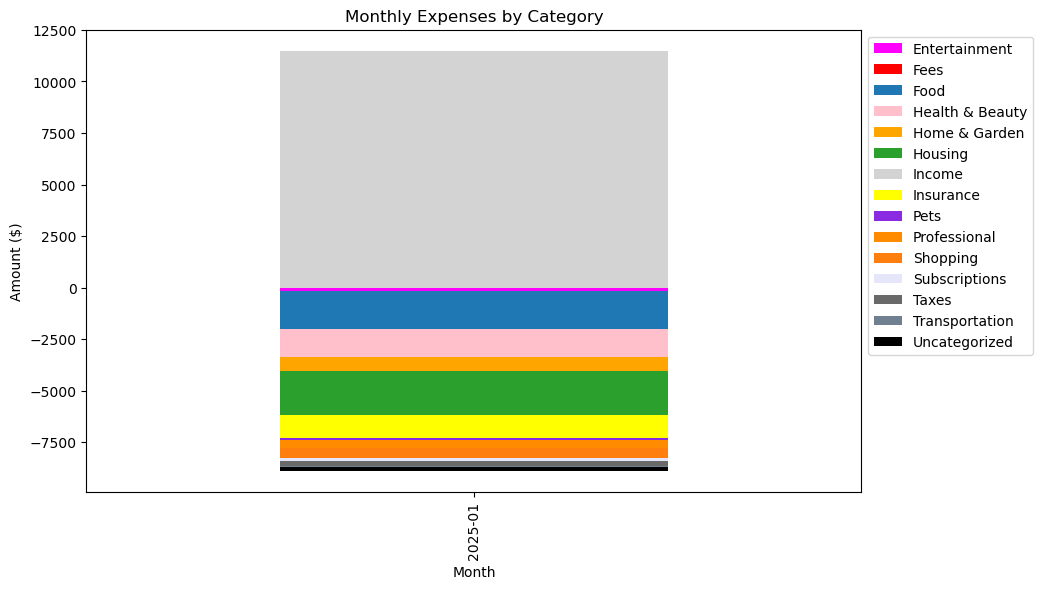

In [42]:
import matplotlib.pyplot as plt

# Define your custom colors for each category
category_colors = {
    'Food': '#1f77b4',  # Blue
    'Shopping': '#FF6666', # Light Red
    'Housing': '#2ca02c',  # Green
    'Income' : '#D3D3D3', # Light Gray 
    'Travel' : '#8B0000', # Dark Red
    'Education' : '#800080', # Purple
    'Entertainment' : '#FF00FF', # Magenta
    'Fees'  : '#FF0000', # Red
    'Health & Beauty' : '#FFC0CB', # Pink
    'Home & Garden' : '#FFA500', # Orange
    'Insurance' : '#FFFF00', # Yellow
    'EXCLUDE' : '#FF6666', # Light Red
    'Pets' : '#8A2BE2', # Violet
    'Miscellaneous' : '#708090', # Slate Gray
    'Subscriptions' : '#E6E6FA', # Lavender
    'Taxes' : '#696969', # Dim Gray
    'Transportation' : '#708090', # Slate Gray
    'Uncategorized' : '#000000', # Black
    'Professional' : '#FF8C00', # Dark Orange

    # Add more categories and colors as needed
    # '#FFFF00', # Yellow
    # '#FF0000', # Red
    # '#800080', # Purple
    # '#8A2BE2', # Violet
    # '#FFA500', # Orange
    # '#FFC0CB', # Pink
    # '#FF00FF', # Magenta
    # '#D8BFD8', # Light Purple
    # '#E6E6FA', # Lavender
    # '#FF6666', # Light Red
    # '#FFFFE0', # Light Yellow
    # '#FF8C00', # Dark Orange
    # '#8B0000', # Dark Red
    # '#FF1493', # Deep Pink
    # '#D3D3D3', # Light Gray 
    # '#708090', # Slate Gray
    # '#696969', # Dim Gray
    # '#000000', # Black
}

# Get the list of unique categories in your data
categories = monthly_expenses.columns

# Map the colors to the categories
colors = [category_colors[cat] for cat in categories]

# Plot monthly expenses by category
monthly_expenses.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Monthly Expenses by Category')
plt.xlabel('Month')
plt.ylabel('Amount ($)')

# Move the legend to the best location
# plt.legend(loc='best')
# Move the legend to the outside right of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()